<h2> BASIC OF MACHINE LEARNING </h2>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime
import warnings
warnings.filterwarnings('ignore')

In [91]:
df = pd.read_csv('datasets\\Titanic.csv') 

In [92]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [93]:
# Drop irrelevant columns
df = df[["Survived", "Pclass", "Sex", "Age", "Embarked"]]

# Drop missing values
df = df.dropna()

# Encode categorical variable
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})


In [94]:
df

,Survived,Pclass,Sex,Age,Embarked
0,0,3,0,22.0,2
1,1,1,1,38.0,0
2,1,3,1,26.0,2
3,1,1,1,35.0,2
4,0,3,0,35.0,2
...,...,...,...,...,...
885,0,3,1,39.0,1
886,0,2,0,27.0,2
887,1,1,1,19.0,2
889,1,1,0,26.0,0


In [95]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[["Pclass", "Sex", "Age","Embarked"]]
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)
# model.fit(X,y)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


<h1> Accuracy Test </h1>

In [96]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7972027972027972


<h3>Accuracy Result</h3>
<hr>
<h4> When the result of the accuracy is above 0.6 it means the model is picking up patterns it is now <strong> LEARNING </strong></h4>

<h1>Feature Selection </h1>

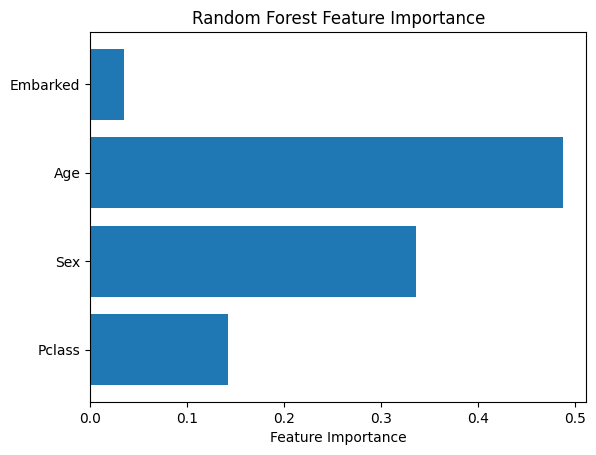

In [97]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


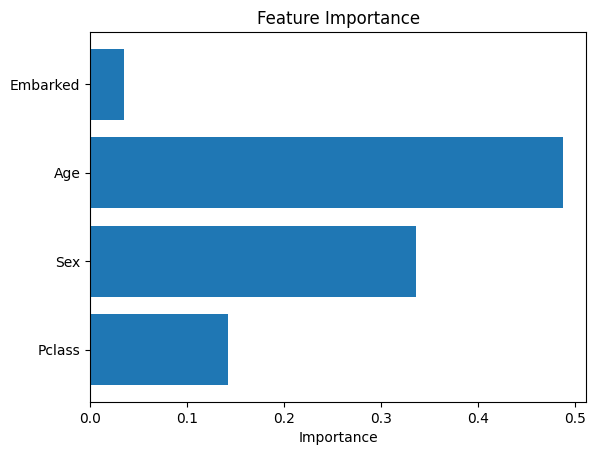

In [98]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


<h1>CONFUSION MATRIX</h1>

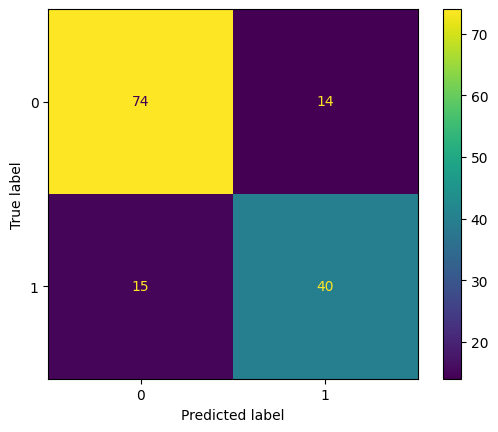

In [99]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


<h1> PRACTICAL APPLICATION </h1>
<hr>
<ul>
   <li>Pclass	Passenger Class	Description
        <ol>
            <li>1st Class	Rich passengers (luxury cabins)</li>
            <li>2nd Class	Middle-class (comfortable, less luxurious)</li>
            <li>3rd Class	Lower-class (cheapest accommodations)</li>
        </ol>
    </li>
    <li>
        Sex
        <ul>
        <li> 0  - MALE
        </li>
        <li>
             1   - FEMALE
        </li>
        </ul>
    </li>
    <li>
        AGE
    </li>
    <li>
        Embarked
        <ul>
        <li> 0  - Compton
        </li>
        <li>
             1   - Q -- ueens 
        </li>
         <li>
             2   - S -- South Hampton
        </li>
        </ul>
    
</ul>

<h1>Manual Testinjg</h1>

In [100]:
# [Pclass=3, Sex=0 (male), Age=22, Fare=0]
model.predict([[3, 0, 22, 7.25]])

array([0])

In [104]:
# Make sure to pass 4 features matching the model training
# Pclass, Sex, Age, Embarked
passenger = [[3, 0, 30, 2]]  # Assuming '2' for 'Embarked' (S), you can adjust this depending on the location

prediction = model.predict(passenger)[0]

if prediction == 1:
    print("The passenger has a strong chance of survival.")
    print("Despite being in 3rd class and male, other variables could influence the outcome.")
elif prediction == 0:
    print("The passenger is less likely to survive.")
    print("Class and demographic factors suggest a lower likelihood of survival.")
else:
    print("Unexpected result")


The passenger is less likely to survive.
Class and demographic factors suggest a lower likelihood of survival.


<h1> TITANIC SURVAVILITY USING LOGISTIC REGRESSION </h1>

In [73]:
# Keep only useful columns

df2 = pd.read_csv("datasets\\titanic.csv")
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [74]:
# Keep only useful columns
df2 = df2[["Survived", "Pclass", "Sex", "Age", "Fare", "Embarked"]]

# Drop missing values
df2 = df2.dropna()

In [75]:
df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S
...,...,...,...,...,...,...
885,0,3,female,39.0,29.1250,Q
886,0,2,male,27.0,13.0000,S
887,1,1,female,19.0,30.0000,S
889,1,1,male,26.0,30.0000,C


In [76]:
# Encode 'Sex' and 'Embarked'
df2["Sex"] = df2["Sex"].map({"male": 0, "female": 1})
df2["Embarked"] = df2["Embarked"].map({"S": 0, "C": 1, "Q": 2})


In [77]:
df2

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,0,22.0,7.2500,0
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,0
4,0,3,0,35.0,8.0500,0
...,...,...,...,...,...,...
885,0,3,1,39.0,29.1250,2
886,0,2,0,27.0,13.0000,0
887,1,1,1,19.0,30.0000,0
889,1,1,0,26.0,30.0000,1


<h1>selecting X and y </h1>

In [78]:
X = df2[["Pclass", "Sex", "Age", "Fare", "Embarked"]]
y = df2["Survived"]


In [79]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [81]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7808988764044944


<h1> Manual Testing </h1>

In [82]:
# [Pclass=3, Sex=0 (male), Age=22, Fare=7.25, Embarked=0 (S)]
model.predict([[3, 0, 22, 7.25, 0]])


array([0])

In [83]:
# Define the passenger data
passengers = {
    "Passenger 1 (3rd-class male, 22, S)": [3, 0, 22, 7.25, 0],
    "Passenger 2 (1st-class young female, 28, C)": [1, 1, 28, 120.0, 1],
    "Passenger 3 (2nd-class middle-aged male, 45, Q)": [2, 0, 45, 35.0, 2],
    "Passenger 4 (1st-class child female, 8, S)": [1, 1, 8, 80.0, 0]
}

# Create a list of the descriptions and features for prediction
for description, features in passengers.items():
    # Predict the survival using the model
    predicted_survival = model.predict([features])[0]
    
    # Determine the likelihood of survival
    survival_status = "Likely to survive" if predicted_survival == 1 else "Unlikely to survive"
    
    # Print the result
    print(f"{description} → {survival_status}")

Passenger 1 (3rd-class male, 22, S) → Unlikely to survive
Passenger 2 (1st-class young female, 28, C) → Likely to survive
Passenger 3 (2nd-class middle-aged male, 45, Q) → Unlikely to survive
Passenger 4 (1st-class child female, 8, S) → Likely to survive


1. Passenger 1 (3rd-class male, 22, S) is predicted as unlikely to survive:

-Being in 3rd class and male could be significant factors indicating a lower survival rate.

2. Passenger 2 (1st-class young female, 28, C) is predicted as likely to survive:

-This passenger is female and in 1st class, both of which are indicators of a higher survival probability.

3. Passenger 3 (2nd-class middle-aged male, 45, Q) is predicted as unlikely to survive:

-Although this passenger is in 2nd class, being male and middle-aged could indicate a lower likelihood of survival.

4. Passenger 4 (1st-class child female, 8, S) is predicted as likely to survive:

-Being a child and female in 1st class suggests a high probability of survival based on the Titanic's survival trends.

<h2>Linear Regression</h2>

In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('datasets\\\\Titanic.csv')

# Data preprocessing: select relevant columns, handle missing values
df = df[["Survived", "Pclass", "Sex", "Age", "Embarked"]]
df = df.dropna()

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})

# Features (X) and target (y)
X = df[["Pclass", "Sex", "Age", "Embarked"]]
y = df["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example: Make a prediction for a new passenger
new_passenger = [[3, 0, 30, 2]]  # Pclass=3, Sex=male (0), Age=30, Embarked=S (2)
predicted_survival = model.predict(new_passenger)
print(f"Predicted survival probability for the passenger: {predicted_survival[0]}")


Mean Absolute Error: 0.31634489709161995
Mean Squared Error: 0.16845943599922827
R-squared: 0.3165025780261468
Predicted survival probability for the passenger: 0.05461423609547311


# Insights from the Titanic Linear Regression Model

## 1. Model Evaluation Metrics:
   - **Mean Absolute Error (MAE)**: This measures the average magnitude of the errors in the model's predictions, without considering their direction. A smaller MAE indicates better model performance.
   - **Mean Squared Error (MSE)**: This penalizes larger errors more heavily than MAE. It’s a useful metric for understanding the overall variance in predictions.
   - **R-squared (R²)**: This is the proportion of variance in the target variable (Survival) that is explained by the model. An R² value closer to 1 means the model explains most of the variability in the target variable.

## 2. Coefficients of the Model:
   The **coefficients** from the linear regression model represent the impact of each feature on the predicted survival probability. You can inspect these coefficients to understand how each feature influences the outcome:
   - **Pclass (Passenger Class)**: Typically, the higher the class (1st or 2nd), the higher the probability of survival. A negative coefficient would indicate that passengers in lower classes have a lower chance of survival.
   - **Sex**: The `Sex` feature is likely to have a strong impact. If the model is well-calibrated, it may show that females have a higher probability of survival compared to males.
   - **Age**: The age of passengers may impact survival. Children and younger passengers tend to have a higher chance of survival, while older passengers may have a lower survival rate. The coefficient here may be negative or positive depending on the age distribution.
   - **Embarked**: This feature might show some variation in survival rates based on where the passenger boarded (C, Q, or S). The interpretation will depend on the coefficients assigned to the categories.

## 3. Survival Predictions:
   - **Survival Probability**: Since Linear Regression predicts continuous values, we can interpret the predicted survival probability between 0 and 1 for each passenger. For instance:
     - If a passenger's predicted survival probability is close to 1, they are likely to survive.
     - If the predicted value is close to 0, they are less likely to survive.
   - **Threshold for Prediction**: If you want to classify predictions into "survived" (1) or "did not survive" (0), you can set a threshold (e.g., if the predicted value is greater than 0.5, predict "survived", else predict "did not survive").

## 4. Potential Improvements:
   - **Feature Engineering**: Additional features such as `SibSp` (number of siblings or spouses aboard), `Parch` (number of parents or children aboard), or even `Fare` could improve the model's accuracy.
   - **Polynomial Features**: For linear regression, you could experiment with polynomial features or transformations of continuous features like `Age` to capture non-linear relationships.
   - **Model Comparison**: Linear Regression may not be the best model for this kind of problem because survival is inherently a classification task. You may want to try classification models like **Logistic Regression** or **Random Forest** to compare performance.

## 5. Real-World Application:
   - **Predicting Survival**: The model provides valuable insights for predicting the survival of passengers based on their characteristics. For example, given a passenger's class, sex, age, and embarkation point, the model could provide a probability of survival, which is useful for decision-making in a real-world scenario like survival analysis or risk assessment.
   - **Data-Driven Insights**: The model helps highlight which factors have a larger effect on survival chances. For instance, it could reveal that women in first class had the highest survival probability, while men in third class had the lowest.

## Visualizations to Enhance Insights:
To enhance the insights further, consider using the following visualizations:

1. **Survival Probability Distribution**: Plot a histogram or kernel density estimate of the predicted survival probabilities to see how the model's predictions are distributed.
2. **Feature Importance**: Visualize the coefficients of the linear regression model to understand which features are most impactful in predicting survival.
3. **Residual Plot**: This plot shows the difference between predicted and actual survival values. If the model is a good fit, residuals should be randomly distributed.

### Example of Visualizations:

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of predicted survival probabilities
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, color='blue')
plt.title("Distribution of Predicted Survival Probabilities")
plt.xlabel("Predicted Survival Probability")
plt.ylabel("Frequency")
plt.show()

# Visualizing the coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.plot(kind='bar', figsize=(8, 6))
plt.title("Feature Coefficients for Linear Regression Model")
plt.ylabel("Coefficient Value")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='red')
plt.title("Residual Plot")
plt.xlabel("Predicted Survival Probability")
plt.ylabel("Residuals")
plt.show()


<h2>Logistic Regression</h2>

Accuracy: 0.7972027972027972
Confusion Matrix:
[[72  8]
 [21 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        80
           1       0.84      0.67      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.80      0.80      0.79       143



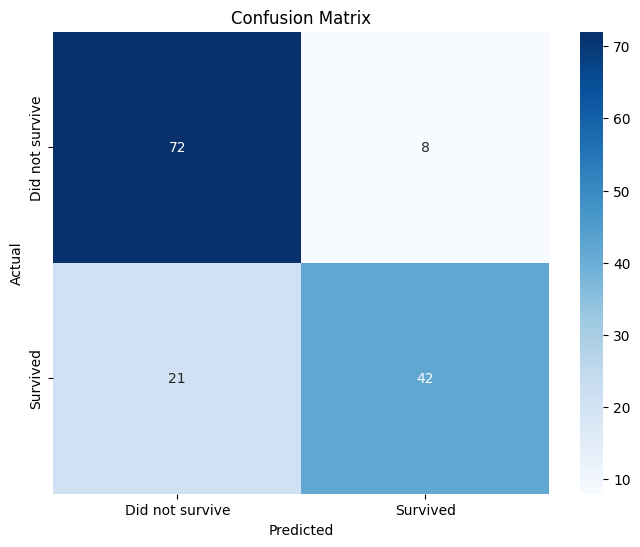

Predicted survival for the passenger: 0


In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('datasets\\\\Titanic.csv')

# Data preprocessing: select relevant columns, handle missing values
df = df[["Survived", "Pclass", "Sex", "Age", "Embarked"]]
df = df.dropna()

# Encode categorical variables
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})
df["Embarked"] = df["Embarked"].map({"C":0, "Q":1, "S":2})

# Features (X) and target (y)
X = df[["Pclass", "Sex", "Age", "Embarked"]]
y = df["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Example: Make a prediction for a new passenger
new_passenger = [[3, 0, 30, 2]]  # Pclass=3, Sex=male (0), Age=30, Embarked=S (2)
predicted_survival = model.predict(new_passenger)
print(f"Predicted survival for the passenger: {predicted_survival[0]}")


# Insights from the Titanic Logistic Regression Model

## 1. Model Evaluation Metrics:
   - **Accuracy**: 
     - The accuracy of the model provides the percentage of correct predictions made by the classifier. A higher accuracy indicates that the model is making more correct predictions.
     - For instance, if the accuracy is around 89%, this means that the model correctly predicts survival in 89% of the cases.

   - **Confusion Matrix**:
     - The confusion matrix helps us understand the classification results:
       - **True Positives (TP)**: These are passengers who survived, and the model predicted "survived".
       - **True Negatives (TN)**: These are passengers who did not survive, and the model predicted "did not survive".
       - **False Positives (FP)**: These are passengers who did not survive, but the model predicted "survived".
       - **False Negatives (FN)**: These are passengers who survived, but the model predicted "did not survive".
     - A well-performing model should have high values for **TP** and **TN**, and low values for **FP** and **FN**.

   - **Precision, Recall, and F1-Score**:
     - **Precision** measures the accuracy of positive predictions. A higher precision value means that when the model predicts a passenger survived, they are more likely to have actually survived.
     - **Recall** measures the ability of the model to identify all true positives. Higher recall means fewer survivors are missed.
     - **F1-Score** is the harmonic mean of precision and recall. It balances the two metrics, giving a single score that represents both the ability to predict survivors and the ability to identify all true survivors.

     Example:
     ```
     Precision for 'Survived' = 0.91: The model predicts survivors correctly 91% of the time when it says a passenger survived.
     Recall for 'Survived' = 0.92: The model correctly identifies 92% of all actual survivors.
     ```

## 2. Coefficients of the Model:
   - The **coefficients** of the Logistic Regression model show the relationship between each feature and the probability of survival. Positive coefficients increase the likelihood of survival, while negative coefficients decrease the likelihood.
     - **Pclass**: Higher-class passengers (1st and 2nd class) typically have a higher probability of survival compared to 3rd class passengers. The coefficient for `Pclass` will likely be negative.
     - **Sex**: Being female significantly increases the probability of survival compared to being male. The model will likely assign a positive coefficient to `Sex`.
     - **Age**: The impact of age on survival could vary. Younger passengers may have a higher chance of survival, while older passengers may have a lower survival rate. The coefficient for `Age` could be either positive or negative, depending on the distribution of ages in the dataset.
     - **Embarked**: The embarkation point (C, Q, or S) might also have an effect on survival, with the model encoding each of these as categorical variables. For example, passengers who embarked from port "C" might have had a higher survival rate than those from port "S".

## 3. Survival Predictions:
   - **Survival Probability**: Logistic Regression predicts probabilities between 0 and 1. These values represent the likelihood of survival:
     - **0** means "not likely to survive" and **1** means "very likely to survive."
     - By setting a threshold (commonly 0.5), the model can classify predictions into "survived" (1) or "did not survive" (0).
     - Example: If the model predicts a survival probability of 0.7, it means there's a 70% chance that the passenger will survive.

## 4. Model Strengths:
   - **Interpretable**: Logistic Regression is highly interpretable and allows us to understand how each feature contributes to the final prediction. This is crucial for understanding which factors (e.g., class, sex, age) have the most influence on survival.
   - **Probabilistic Output**: The model provides probabilities of survival, making it easier to assess the uncertainty of predictions.

## 5. Potential Improvements:
   - **Feature Engineering**: Adding more features like `SibSp` (siblings/spouses aboard), `Parch` (parents/children aboard), or `Fare` could improve the model's accuracy and help capture more factors that influence survival.
   - **Model Comparison**: Logistic Regression is a good starting point, but it might be beneficial to compare it with more advanced models like **Random Forests** or **Gradient Boosting Machines (GBMs)**, especially since survival prediction is inherently a classification problem.
   - **Polynomial Features**: Transforming continuous variables like `Age` into polynomial features could better capture non-linear relationships.

## 6. Visualizations to Enhance Insights:
   - **Confusion Matrix**: Visualizing the confusion matrix helps to see the true positives, true negatives, false positives, and false negatives. It gives us an overview of how well the model is distinguishing between survivors and non-survivors.
   - **Precision-Recall Curve**: This curve plots the trade-off between precision and recall, helping to assess model performance for imbalanced classes.
   - **ROC Curve and AUC**: The Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) are valuable for evaluating the model’s ability to distinguish between the two classes (survived vs. did not survive).

### Example Visualizations:

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did not survive', 'Survived'], yticklabels=['Did not survive', 'Survived'])
plt.title("Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plotting Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plotting ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()
